In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("brfss_for_bda_2021.csv", low_memory=False)

In [4]:
for column in df.columns:
    if "Data do not meet the criteria for statistical reliability, data quality, or confidentiality (data are suppressed)" in str(df[column][0]):
        del df[column]

There are many columns to influence data analysis. Only columns relevant to proposed questions should be selected.

QUESTIONS:
1. What factors contribute to the correlation between wealth and health?
2. Can level of physical activity be predicted using various health factors such as smoking and high blood pressure?
3. Is there a pattern over time to adopt and maintain healthier eating habits after being diagnosed with diabetes?

Index:
1.
'_INCOMG' - COMPUTED INCOME CATEGORIES
'_RFHLTH' - ADULTS WITH GOOD OR BETTER HEALTH
'HLTHPLN1' - Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare?
'MEDBILL1' - Do you currently have any health care bills that are being paid off over time?
'MEDCOST' - Was there a time in the past 12 months when you did not take your medication as prescribed because of cost? Do not include OTC
'MEDICARE' - Do you have Medicare?
'NOCOV121' - In the past 12 months was there any time when you did NOT have ANY health insurance or coverage?

2.
'_PACAT1'- PHYSICAL ACTIVITY CATEGORIES
'_RFBING5' - BINGE DRINKING CALCULATED VARIABLE
'_RFBMI5' - OVERWEIGHT OR OBESE CALCULATED VARIABLE
'_RFCHOL' - HIGH CHOLESTEROL CALCULATED VARIABLE
'_RFHYPE5' - HIGH BLOOD PRESSURE CALCULATED VARIABLE
'_RFSMOK3' - CURRENT SMOKING CALCULATED VARIABLE

3.
'_FRUTSUM' - TOTAL FRUITS CONSUMED PER DAY
'_VEGESUM' - TOTAL VEGETABLES CONSUMED PER DAY
'AGE' - What is your age?
'DIABAGE2' - AGE WHEN TOLD DIABETIC
'DIABETE3' - Has a doctor, nurse, or other health professional ever told you have diabetes?

In [5]:
d1 = df[['_INCOMG','NOCOV121','MEDICARE','MEDCOST','MEDBILL1','HLTHPLN1', '_RFHLTH']]
d2 = df[['_PACAT1','_RFBING5','_RFBMI5','_RFCHOL','_RFHYPE5','_RFSMOK3']]
d3 = df[['_RFHLTH','_FRUTSUM', '_VEGESUM']]

Approaches:
1. Decision Tree
2. Naive Bayes
3. Support Vector Machine

In [6]:
# Filter missing values
d1 = d1.where(d1['_INCOMG']!="Don't know/Not sure/Missing").where(d1['NOCOV121']!="Not asked or Missing").where(d1['MEDICARE']!="Not asked or Missing").where(d1['MEDCOST']!="Not asked or Missing").where(d1['MEDBILL1']!="Not asked or Missing").where(d1['HLTHPLN1']!="Not asked or Missing").where(d1['_RFHLTH']!="Not asked or Missing")
d1 = d1.dropna()
# print(d1)

In [7]:
# Convert income level into binary numerical form
d1["_INCOMG"]=d1["_INCOMG"].map({"$50,000 or more":1,"$35,000 to less than $50,000":0, "$25,000 to less than $35,000":0, "$15,000 to less than $25,000":0, "Less than $15,000":0})

In [8]:
# Convert responses to binary numerical form
d1["NOCOV121"]=d1["NOCOV121"].map({"Yes":1, "No":0})
d1["MEDICARE"]=d1["MEDICARE"].map({"Yes":1, "No":0})
d1["MEDCOST"]=d1["MEDCOST"].map({"Yes":1, "No":0})
d1["MEDBILL1"]=d1["MEDBILL1"].map({"Yes":1, "No":0})
d1["HLTHPLN1"]=d1["HLTHPLN1"].map({"Yes":1, "No":0})
d1=d1.dropna()

In [9]:
# Convert health to binary integer form, type conversion from float to int
d1["_RFHLTH"]=d1["_RFHLTH"].map({"Good or Better Health":1, "Fair or Poor Health":0})
d1=d1.dropna()
d1 = d1.astype({"_RFHLTH":'int64'})
d1.head()

,_INCOMG,NOCOV121,MEDICARE,MEDCOST,MEDBILL1,HLTHPLN1,_RFHLTH
334,1,0.0,0.0,0.0,0.0,1,1
335,0,0.0,0.0,1.0,1.0,1,0
337,0,0.0,0.0,1.0,0.0,1,1
338,1,0.0,0.0,0.0,0.0,1,1
340,1,0.0,0.0,0.0,0.0,1,1


In [10]:
d2["_PACAT1"] = d2["_PACAT1"].map({"Inactive":0, "Insufficiently Active":0, "Active":1, "Highly Active":1})
d2["_RFBING5"]=d2["_RFBING5"].map({"Yes":1, "No":0})
d2["_RFBMI5"]=d2["_RFBMI5"].map({"Yes":1, "No":0})
d2["_RFCHOL"]=d2["_RFCHOL"].map({"Yes":1, "No":0})
d2["_RFHYPE5"]=d2["_RFHYPE5"].map({"Yes":1, "No":0})
d2["_RFSMOK3"]=d2["_RFSMOK3"].map({"Yes":1, "No":0})
d2=d2.dropna()
d2 = d2.astype({"_PACAT1":'int64', "_RFBING5":'int64', "_RFBMI5":'int64', "_RFCHOL":'int64', "_RFHYPE5":'int64',"_RFSMOK3":'int64'})

<ipython-input-10-5d952b087c19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2["_PACAT1"] = d2["_PACAT1"].map({"Inactive":0, "Insufficiently Active":0, "Active":1, "Highly Active":1})
<ipython-input-10-5d952b087c19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2["_RFBING5"]=d2["_RFBING5"].map({"Yes":1, "No":0})
<ipython-input-10-5d952b087c19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [11]:
d3 = d3.dropna()
d3["_RFHLTH"]=d3["_RFHLTH"].map({"Good or Better Health":1, "Fair or Poor Health":0})
d3 = d3.dropna()
d3 = d3.astype({"_RFHLTH":'int64'})

Question 1 Decision Tree

In [12]:
# Implement a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

input_features = ['_INCOMG','NOCOV121','MEDICARE','MEDCOST','MEDBILL1','HLTHPLN1']

X = d1[input_features]
y = d1['_RFHLTH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [13]:
# Create and train the classifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [14]:
# Run a prediction test and measure results accuracy

from sklearn import metrics

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8414735099337748


In [15]:
# Set up a function to build a decision tree visualization

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_decision_tree(model, feature_names, class_names):
    # plot_tree function contains a list of all nodes and leaves of the Decision tree
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=10)
    
    # I return the tree for the next part
    return tree


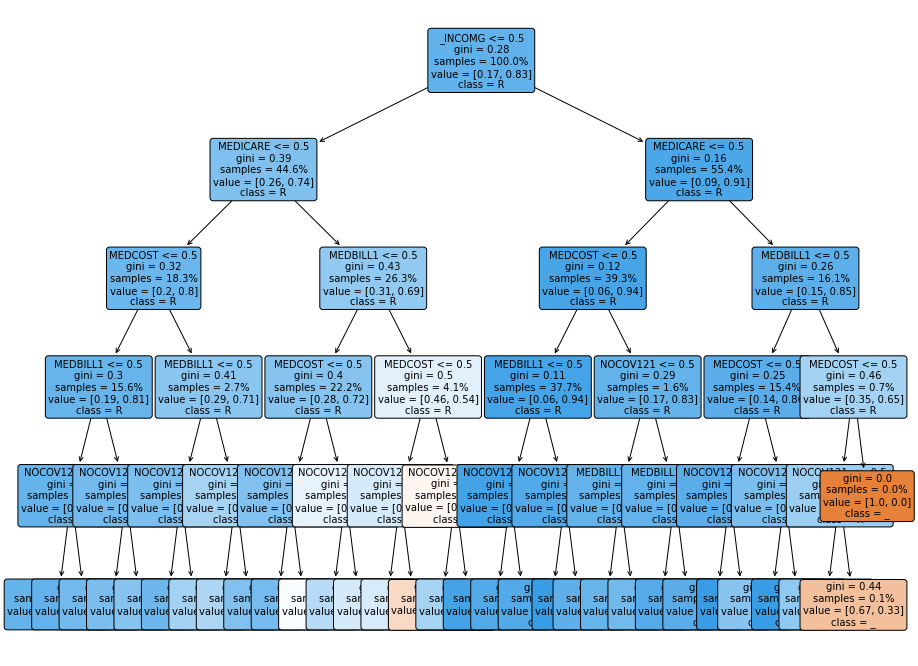

In [16]:
# Plot and present the visualization by calling the function

fig = plt.figure(figsize=(15, 12))
plot_decision_tree(clf, input_features, '_RFHLTH')
plt.show()

In [17]:
# Print feature importance using the feature_importances_ attribute

print(dict(zip(input_features, clf.feature_importances_)))

{'_INCOMG': 0.5991952247405788, 'NOCOV121': 0.022818504780445805, 'MEDICARE': 0.1663062816842345, 'MEDCOST': 0.08642174966031227, 'MEDBILL1': 0.12525823913442866, 'HLTHPLN1': 0.0}


Question 2 Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

input_features = ['_RFBING5','_RFBMI5','_RFCHOL','_RFHYPE5','_RFSMOK3']

X = d2[input_features]
y = d2['_PACAT1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [19]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5268943855516294


In [21]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf, X_test, y_test)
print(imps.importances_mean)

[0.00235571 0.         0.         0.         0.01209266]


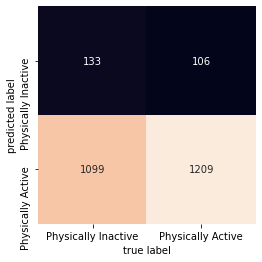

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Physically Inactive', 'Physically Active'], yticklabels=['Physically Inactive', 'Physically Active'])
plt.xlabel('true label')
plt.ylabel('predicted label');

Question 3 Support Vector Machine

In [23]:
from sklearn import svm

input_features = ['_FRUTSUM', '_VEGESUM']

X = d3[input_features]
y = d3['_RFHLTH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [24]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [25]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.823961661341853


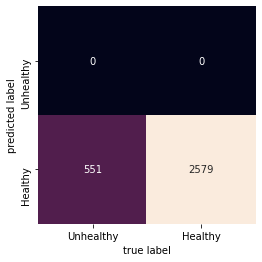

In [26]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [27]:
len(d3.where(d3['_RFHLTH']==1).dropna())

8679

In [28]:
len(d3.where(d3['_RFHLTH']==0).dropna())

1752

In [29]:
# Export dataframes
d1.to_csv('question1.csv')
d2.to_csv('question2.csv')
d3.to_csv('question3.csv')